In [97]:
# Import des bibliothèques
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import pyplot as ply
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, fcluster 

import seaborn as sns

from sklearn.decomposition import PCA
# Va nous servir à instancier l'algorithme permettant l'aplication d'une ACP sur nos données
from sklearn import decomposition
from sklearn import preprocessing
from sklearn import cluster, metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import scipy.stats as st
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import linkage, fcluster 
from pandas.plotting import parallel_coordinates

import warnings
warnings.filterwarnings('ignore')

In [98]:
# Bibliothèque des fonctions d'OpenClassrooms 

palette = sns.color_palette("bright", 10)

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    """Display correlation circles, one for each factorial plane"""

    # For each factorial plane
    for d1, d2 in axis_ranks: 
        if d2 < n_comp:

            # Initialise the matplotlib figure
            fig, ax = plt.subplots(figsize=(7,7))

            # Determine the limits of the chart
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # Add arrows
            # If there are more than 30 arrows, we do not display the triangle at the end
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (see the doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # Display variable names
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # Display circle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # Define the limits of the chart
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # Display grid lines
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Correlation Circle (PC{} and PC{})".format(d1+1, d2+1))
            plt.show(block=False)
def append_class(df, class_name, feature, thresholds, names):
    '''Append a new class feature named 'class_name' based on a threshold split of 'feature'.Threshold values are in 'thresholds' and class names are in 'names'.'''
    
    n = pd.cut(df[feature], bins = thresholds, labels=names)
    df[class_name] = n        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    '''Display a scatter plot on a factorial plane, one for each factorial plane'''

    # For each factorial plane
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # Initialise the matplotlib figure      
            fig = plt.figure(figsize=(7,7))
        
            # Display the points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # Display the labels on the points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # Define the limits of the chart
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # Display grid lines
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection of points (on PC{} and PC{})".format(d1+1, d2+1))
            #plt.show(block=False)
            
  

     

# <a name="C3">I - ANALYSE EN COMPOSANTES PRINCIPALES

In [99]:
# Import du fichier
data=pd.read_csv('df_final.csv',index_col='Pays')
# la variable Pays doit être utilisé en tant qu'index
n=data.shape[0]
p=data.shape[1]

In [100]:
data

,Disponibilité alimentaire,Exportations,Importations,Consommation,Production,Nombre d'habitants,Evolution de la population (en %) entre 2000 et 2018,PIB,Stabilité politique
Pays,,,,,,,,,
Afghanistan,1.53,132.185185,29.0,55.0,28.0,36296113.0,78.883566,2058.4,-2.80
Afrique du Sud,35.69,63.000000,514.0,2035.0,1667.0,57009756.0,28.520044,13860.3,-0.28
Albanie,16.36,0.000000,38.0,47.0,13.0,2884169.0,-7.877400,12771.0,0.38
Algérie,6.38,0.000000,2.0,264.0,275.0,41389189.0,36.035334,11737.4,-0.92
Allemagne,19.47,646.000000,842.0,1609.0,1514.0,82658409.0,2.117343,53071.5,0.59
...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,43.47,94.000000,433.0,412.0,48.0,9487203.0,207.299568,67183.6,0.62
Équateur,19.31,0.000000,0.0,324.0,340.0,16785361.0,34.722753,11617.9,-0.07
États-Unis d'Amérique,55.68,3692.000000,123.0,18100.0,21914.0,325084756.0,16.110614,59914.8,0.29


In [101]:
# Avant d'appliquer une ACP, il faut procéder au centrage et à la réduction des données
#Les 2 lignes permettent de mettre à l'échelle toutes les observations et de les stocker dans un nouveau data frame
s_scaler=StandardScaler()
scaled_data=s_scaler.fit_transform(data)

In [102]:
# Vérification des données après mise à l'échelle en affichant les moyennes de nos 9 variables
print(np.mean(scaled_data,axis=0))

[-9.34924652e-17 -1.23358114e-17 -3.11641551e-17  1.03880517e-17
  1.03880517e-17 -1.03880517e-17  7.27163618e-17 -5.19402585e-18
  0.00000000e+00]


Ces moyennes sont très proches de la valeur 0.

In [103]:
print(np.std(scaled_data,axis=0,ddof=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [104]:
# Application de l'ACP sur les données mises à l'échelle
# Les 2 lignes suivantes appliquent la procédure de l'ACP via l'objet pca de type PCA sur les données scaled_data
pca=PCA()
coords=pca.fit_transform(scaled_data)
# La fonction fit_transform retourne les coordonnées de chaque individu analysé dans les nouveaux axes créés par l'ACP.

## _Déterminer le nombre de facteurs pertinents_

In [105]:
# L’inertie mesure la dispersion totale du nuage de points
# Affichage du taux de l'inertie totale expliquée par chacun des 9 axes construits avec l'application de l'ACP
print(pca.explained_variance_ratio_)


[3.55792945e-01 2.37800285e-01 1.11745973e-01 9.57794566e-02
 7.43915963e-02 6.36497969e-02 4.24018985e-02 1.82317157e-02
 2.06332868e-04]


Ces résultats montrent que :
   - le premier axe explique à lui tout seul 35,65 % de l'inertie totale,
   - le deuxième axe explique à lui tout seul 23,79 % de l'inertie totale,
   - le troisième axe explique à lui tout seul 11,09 % de l'inertie totale,
   - le quatrième axe explique à lui tout seul 9,55 % de l'inertie totale, et ainsi de suite.

In [106]:
# Ratio de variance sous forme d'une somme cumulée :
pca.explained_variance_ratio_.cumsum()

array([0.35579294, 0.59359323, 0.7053392 , 0.80111866, 0.87551026,
       0.93916005, 0.98156195, 0.99979367, 1.        ])

Ces résultats illustrent très bien l’idée de l’ACP qui consiste à concentrer un maximum d’inertie sur les premiers axes.

In [107]:
# Les deux instructions suivantes calculent et affichent les dix valeurs propres associées aux dix axes de l’ACP :
eigenvalues = (n-1)/n*pca.explained_variance_ 
print(eigenvalues) 

[3.20213650e+00 2.14020257e+00 1.00571376e+00 8.62015109e-01
 6.69524367e-01 5.72848172e-01 3.81617087e-01 1.64085442e-01
 1.85699582e-03]


L’attribut explained_variance_ correspond à la quantité de l’inertie expliquée par les neuf axes de l’ACP. 
Nous avons multiplié ces quantités par (n-1)/n afin d’apporter un ajustement pour que ces quantités correspondent exactement aux valeurs propres associées aux neuf axes de l’ACP.


Text(0.5, 1.0, 'Les valeurs propres en fonction des facteurs')

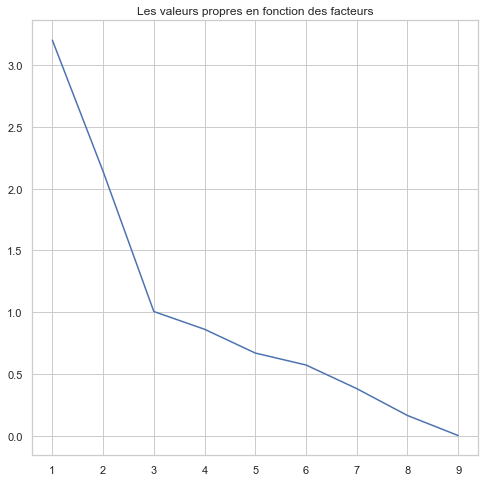

In [108]:
# Graphique où les quantités d’inertie expliquées seront affichées en fonction des axes
fig, axes = plt.subplots(figsize=(8,8)) 
axes.set_xticks(np.arange(10)) 
axes.plot(range(1,p+1),eigenvalues) 
plt.title("Les valeurs propres en fonction des facteurs") 

Cette courbe est intéressante puisqu’elle permet de renforcer notre compréhension de l’ACP. Elle montre clairement que la quantité de l’inertie expliquée est nettement plus importante sur les trois premiers axes que sur les derniers.



Text(0.5, 1.0, 'Cumul de la variance expliquée vs nombre de facteurs')

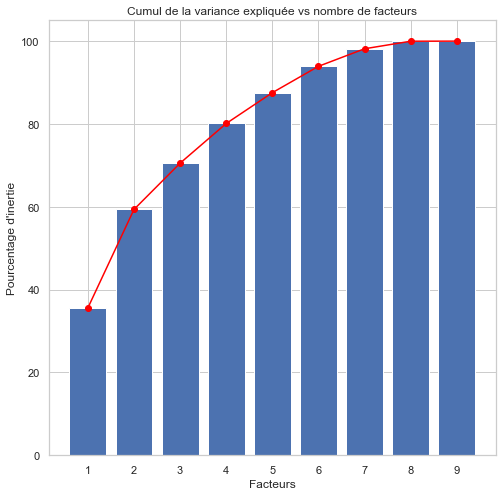

In [109]:
# Graphique
fig, axes = plt.subplots(figsize=(8,8)) 
axes.set_xticks(np.arange(11)) 
axes.plot(np.arange(1,p+1),np.cumsum(pca.explained_variance_ratio_*100),c="red",marker='o') 
plt.bar(np.arange(1,p+1), np.cumsum(pca.explained_variance_ratio_*100)) 
plt.xlabel("Facteurs")
plt.ylabel("Pourcentage d'inertie")
plt.title("Cumul de la variance expliquée vs nombre de facteurs")  

Cette courbe permet d’affirmer visuellement que le plan formé par les quatre premiers axes explique environ 80 % de l’inertie totale et que l’hyperplan formé par les cinq premiers axes explique à lui seul un peu plus de 87 % de l’inertie totale.

In [110]:
# Nombre de composantes
num_components = 5
pcs = pca.components_ 
pc1 = pca.components_[0]
pc2 = pca.components_[1]
pc3 = pca.components_[2]
pc4 = pca.components_[3]
pc5 = pca.components_[4]


In [111]:
# Observation de la composante pc1
pc1

array([ 0.19279494,  0.43023269,  0.20132859,  0.53069192,  0.53356576,
        0.34734765, -0.13463375,  0.16431262,  0.0713802 ])

In [112]:
# Observation de la composante pc2
pc2

array([-0.44717966,  0.04539821, -0.15212741,  0.15491808,  0.15371612,
        0.27550024,  0.30428961, -0.49832734, -0.55711368])

In [113]:
# Observation de la composante pc3
pc3

array([-0.05830297, -0.16022769,  0.76389716, -0.01506331, -0.09164571,
        0.05950402,  0.53930678,  0.26549794, -0.1178196 ])

In [114]:
# Observation de la composante pc4
pc4

array([-0.26867971, -0.48561294,  0.26055479, -0.00364624, -0.08846263,
        0.52974703, -0.57114719, -0.05579003,  0.07943547])

In [115]:
# Observation de la composante pc5
pc5

array([-0.11305212, -0.25227715, -0.48426069,  0.05356106,  0.0434541 ,
        0.4401467 ,  0.46591854,  0.35828215,  0.38096547])

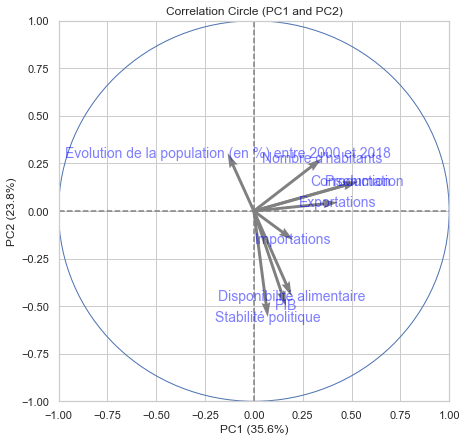

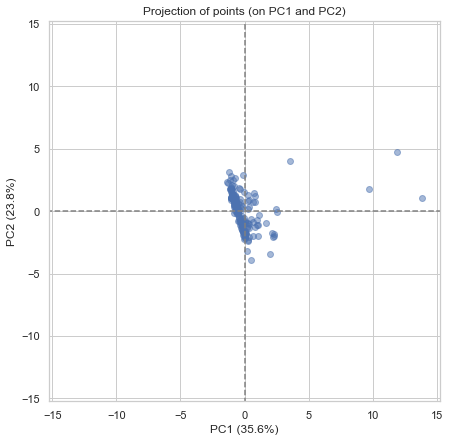

In [116]:
# Cercle des corrélations et projections des points PC1 et PC2

X_projected = pca.transform(scaled_data)
display_circles(pcs, num_components, pca, [(0,1)], labels = np.array(data.columns))
display_factorial_planes(X_projected, num_components, pca, [(0,1)], alpha = 0.5)
plt.show()


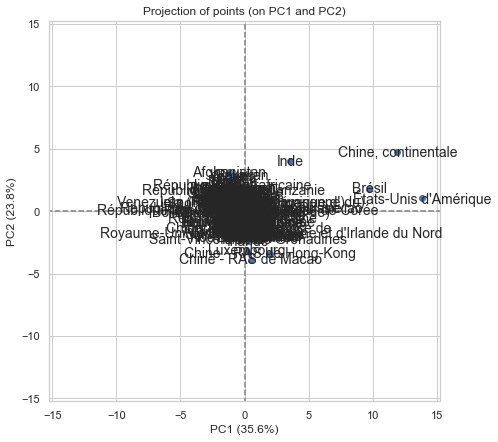

In [117]:
# Projection des pays avec leurs noms
display_factorial_planes(X_projected, num_components, pca, [(0,1)],labels = np.array(data.index))

Les variables les plus corrélées à PC1 sont :
   - Exportations 
   - Consommation 
   - Production

Elles sont corrélées positivement à PC1.

Les pays qui ont une population élevée consomment, produisent et exportent beaucoup de poulets.

Les variables les plus corrélées à PC2 sont :
   - Disponibilité alimentaire
   - Stabilité politique
   - PIB
   - Evolution de la population

Elles sont corrélées positivement à PC2, l'évolution de la population est quand à elle corrélée négativement.   

Plus un pays a un PIB par habitant élevé, meilleure est la stabilité politique et la disponilité alimentaire de poulet, cependant le taux d'évolution de la population est moins important.


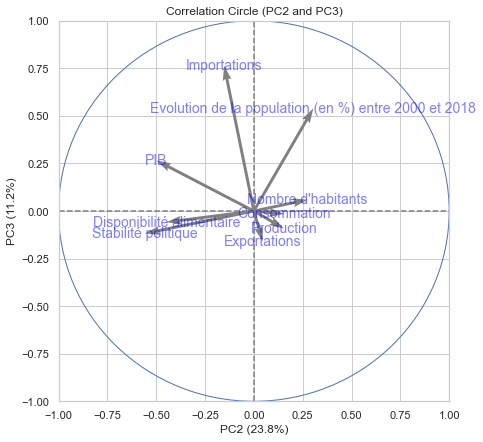

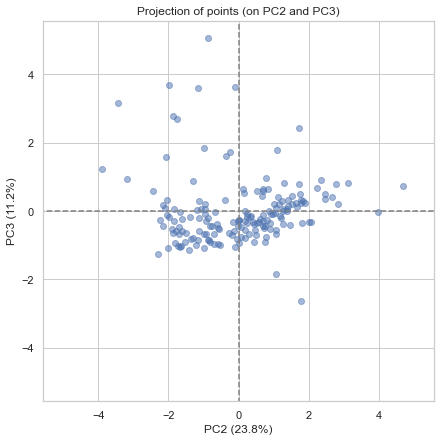

In [118]:
# Cercle des corrélations et projections des points PC2 et PC3

X_projected = pca.transform(scaled_data)
display_circles(pcs, num_components, pca, [(1,2)], labels = np.array(data.columns))
display_factorial_planes(X_projected, num_components, pca, [(1,2)], alpha = 0.5)
plt.show()

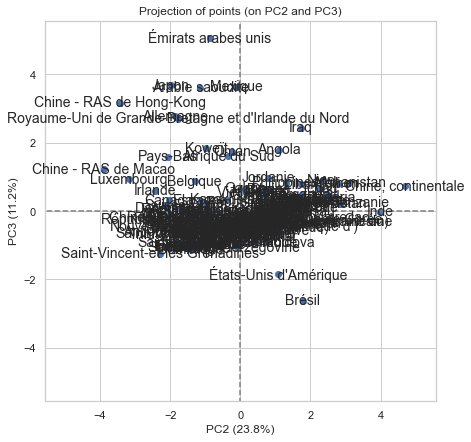

In [119]:
# Projection des pays avec leurs noms
display_factorial_planes(X_projected, num_components, pca, [(1,2)],labels = np.array(data.index))

Les variables les plus corrélées à PC2 sont :
   - Disponibilité alimentaire
   - Stabilité politique
   - PIB
   
Elles sont corrélées négativement à PC2.

Les pays les moins riches ont une plus importante instabilité politique, une disponibilité alimentaire de poulet moins importante et un PIB par habitant moins élevé.

Les variables les plus corrélées à PC3 sont :
   - Evolution de la population entre 2000 et 2018
   - Importations


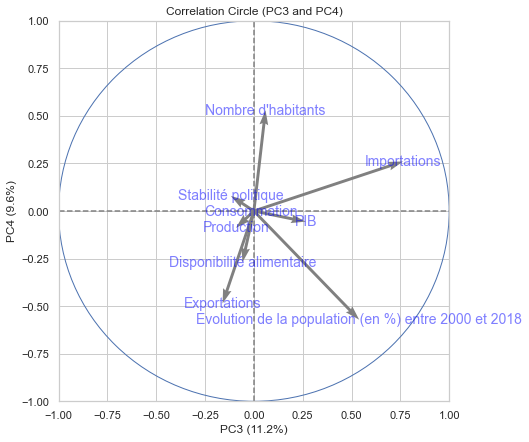

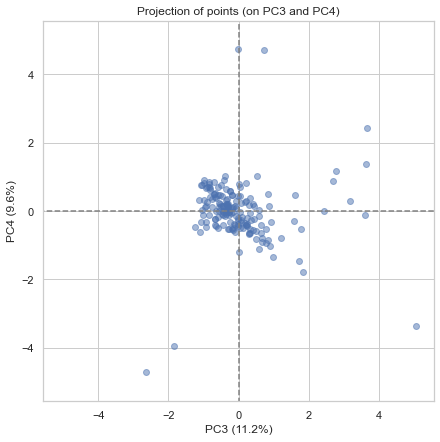

In [120]:
# Cercle des corrélations et projections des points PC3 et PC4

X_projected = pca.transform(scaled_data)
display_circles(pcs, num_components, pca, [(2,3)], labels = np.array(data.columns))
display_factorial_planes(X_projected, num_components, pca, [(2,3)], alpha = 0.5)
plt.show()

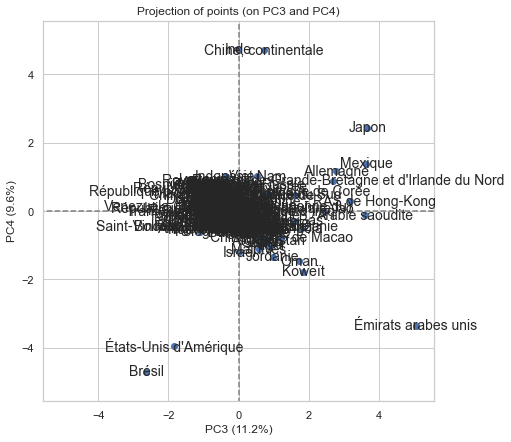

In [121]:
# Projection des pays avec leurs noms
display_factorial_planes(X_projected, num_components, pca, [(2,3)],labels = np.array(data.index))

Les variables les plus corrélées à PC3 sont :
   - Importations
   - PIB 
   
La variable Importations est corrélée positivement à PC3 et la variable PIB négativement.


Les variables les plus corrélées à PC4 sont :
   - Nombre d'habitants
   - Exportations

La variable Nombre d'habitants est corrélée positivement à PC4, la variable Exportations est quand à elle corrélée négativement.   
Plus il y a d'habitants et moins le nombre d'exportations est important.


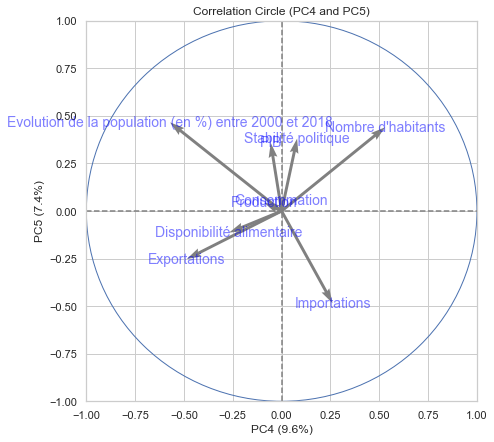

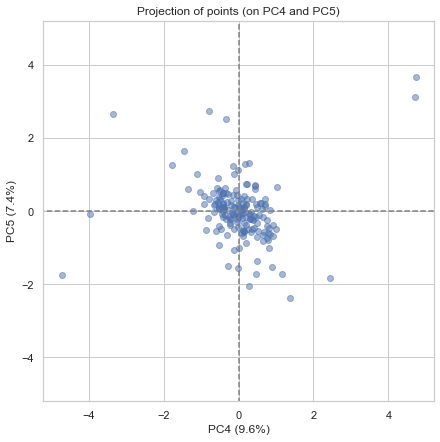

In [122]:
# Cercle des corrélations et projections des points PC4 et PC5

X_projected = pca.transform(scaled_data)
display_circles(pcs, num_components, pca, [(3,4)], labels = np.array(data.columns))
display_factorial_planes(X_projected, num_components, pca, [(3,4)], alpha = 0.5)
plt.show()

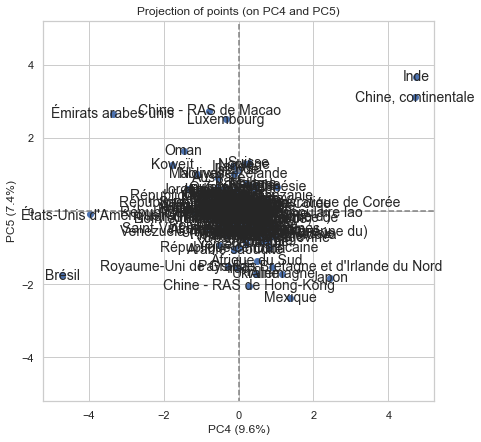

In [123]:
# Projection des pays avec leurs noms
display_factorial_planes(X_projected, num_components, pca, [(3,4)],labels = np.array(data.index))

Les variables les plus corrélées à PC4 sont :
   - Exportations 

Elle est corrélée positivement à PC4.


Les variables les plus corrélées à PC5 sont :
   - Importations
   - Stabilité politique
   - PIB

Les variables Importations et Stabilité politique sont corrélées positivement à PC5, le PIB et l'évolution de la population sont quand à elles corrélées négativement.   



# <a name="C3">II - CLASSIFICATION ASCENDANTE HIÉRARCHIQUE (CAH) (Qui se ressemble s'assemble)

In [124]:
# Choix du data frame utilisé précédemment pour l'ACP
scaled_data

array([[-1.17710405e+00,  4.75136618e-03, -3.17790667e-01, ...,
         1.58011053e+00, -8.90035170e-01, -3.06251658e+00],
       [ 9.76881641e-01, -1.47660704e-01,  2.33530103e+00, ...,
        -9.24800910e-02, -3.10628377e-01, -2.39493147e-01],
       [-2.41986724e-01, -2.86447070e-01, -2.68558038e-01, ...,
        -1.30125225e+00, -3.64106869e-01,  4.99870134e-01],
       ...,
       [ 2.23736682e+00,  7.84687457e+00,  1.96416796e-01, ...,
        -5.04601713e-01,  1.95038808e+00,  3.99047868e-01],
       [-1.26538215e+00,  4.75136618e-03, -4.70958847e-01, ...,
         1.11669981e+00, -8.91841842e-01, -1.80783950e+00],
       [-9.92981148e-01, -2.86447070e-01, -4.43607387e-01, ...,
         8.93434311e-01, -8.60328169e-01,  2.98225603e-01]])

In [125]:
# Clustering hiérarchique avec la méthode de Ward pour diminuer l'inertie intraclasse
Z = linkage(scaled_data, method = 'ward', metric='euclidean')

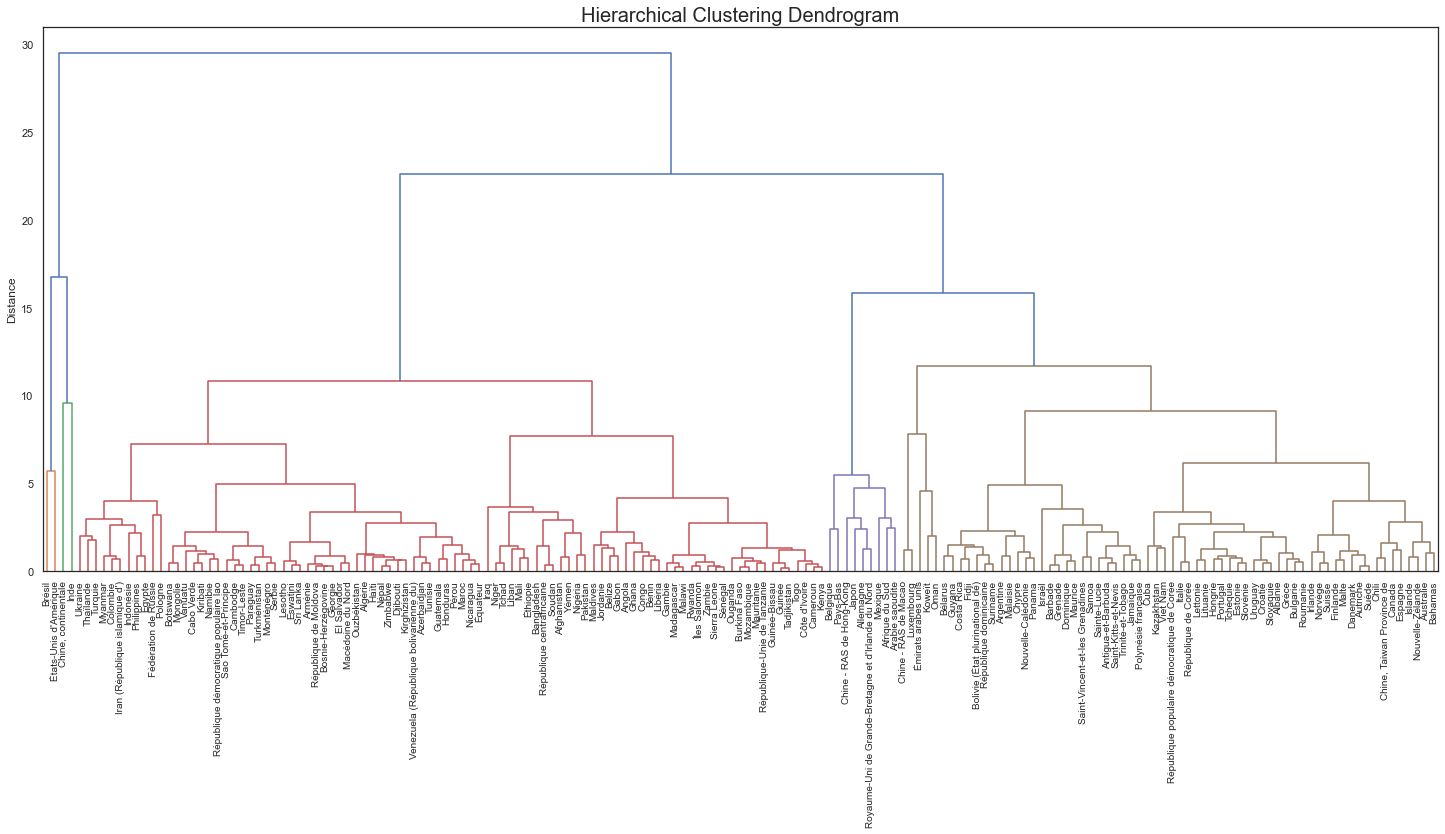

In [126]:
#Affichage d'un premier dendrogramme global
fig =plt.figure(figsize=(25,10))
sns.set_style('white')
plt.title('Hierarchical Clustering Dendrogram', fontsize=20)
plt.ylabel('Distance')
dendrogram(Z, labels = data.index, leaf_font_size=10, color_threshold=12, orientation='top')
plt.show()  

On observe 5 groupes distincts.

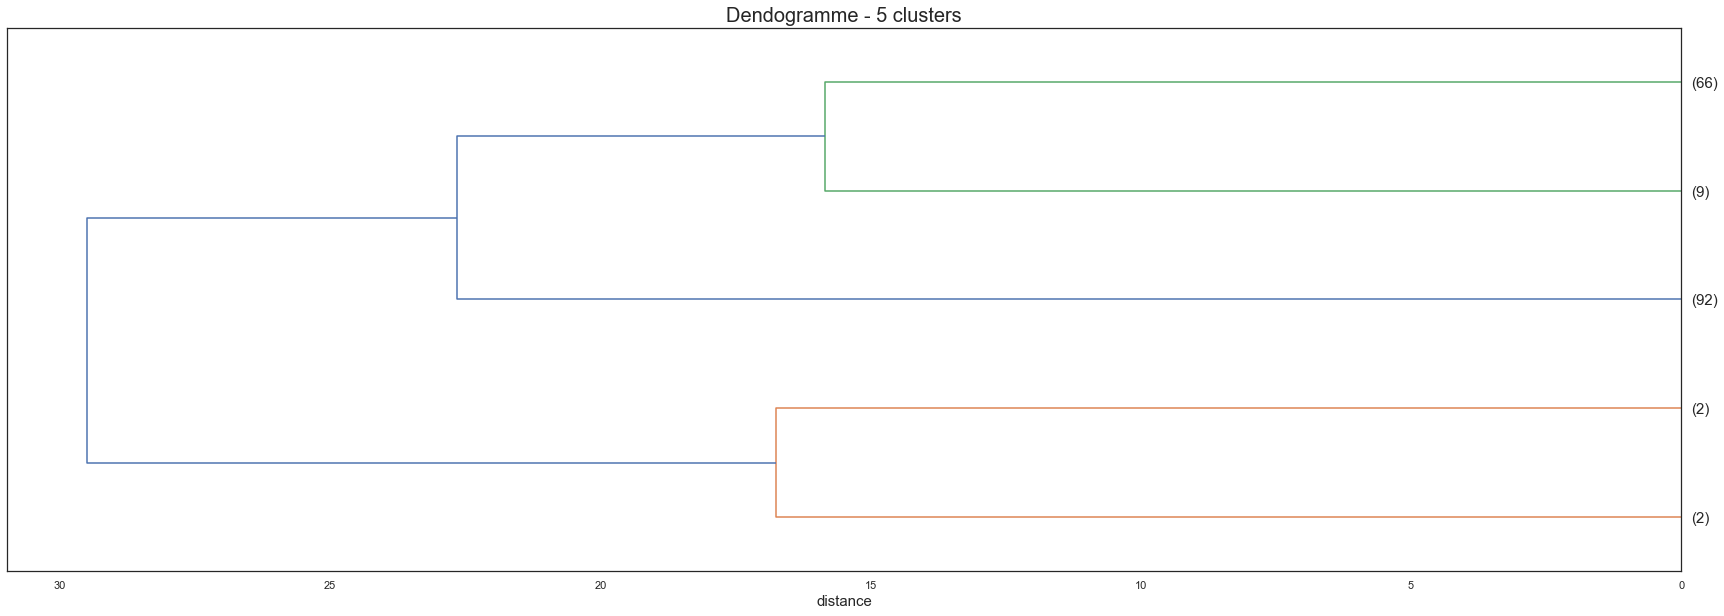

In [127]:
# Coupage du dendrogramme en 5 groupes pour avoir une première idée du partitionnement
fig = plt.figure(figsize=(30,10))
plt.title('Dendogramme - 5 clusters', fontsize=20)
plt.xlabel('distance', fontsize=15)

dendrogram(Z, labels = data.index, p=5, truncate_mode='lastp', leaf_font_size=15, orientation='left')
plt.show()

In [128]:
# Création d'un modèle de clustering hiérarchique
model = AgglomerativeClustering(affinity='euclidean', linkage='ward', compute_full_tree=True) 

In [129]:
# Découpage du dendrogramme en 5 clusters
model.set_params(n_clusters=5)
clusters = model.fit_predict(scaled_data) 

In [130]:
# Ajout du numéro de cluster aux données originales
scaled_data_CAH = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)
scaled_data_CAH['Groupe']=clusters
scaled_data_CAH.reset_index()

,Pays,Disponibilité alimentaire,Exportations,Importations,Consommation,Production,Nombre d'habitants,Evolution de la population (en %) entre 2000 et 2018,PIB,Stabilité politique,Groupe
0,Afghanistan,-1.177104,0.004751,-0.317791,-0.281294,-0.279749,-0.041926,1.580111,-0.890035,-3.062517,2
1,Afrique du Sud,0.976882,-0.147661,2.335301,0.651320,0.383605,0.093409,-0.092480,-0.310628,-0.239493,4
2,Albanie,-0.241987,-0.286447,-0.268558,-0.285062,-0.285820,-0.260227,-1.301252,-0.364107,0.499870,0
3,Algérie,-0.871283,-0.286447,-0.465489,-0.182851,-0.179780,-0.008650,0.157105,-0.414851,-0.956451,2
4,Allemagne,-0.045883,1.136664,4.129557,0.450667,0.321681,0.260988,-0.969323,1.614421,0.735122,4
...,...,...,...,...,...,...,...,...,...,...,...
166,Émirats arabes unis,1.467456,-0.079369,1.892207,-0.113141,-0.271654,-0.217085,5.844852,2.307245,0.768730,0
167,Équateur,-0.055972,-0.286447,-0.476429,-0.154590,-0.153473,-0.169402,0.113514,-0.420718,-0.004241,2
168,États-Unis d'Amérique,2.237367,7.846875,0.196417,8.218210,8.578192,1.844910,-0.504602,1.950388,0.399048,3
169,Éthiopie,-1.265382,0.004751,-0.470959,-0.300606,-0.285415,0.416106,1.116700,-0.891842,-1.807840,2


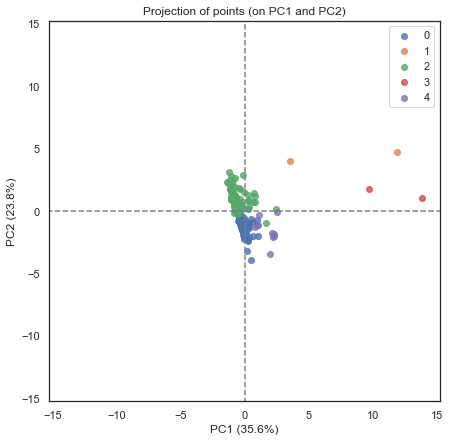

In [131]:
# Création d'un modèle PCA pour réduire nos données à 2 dimensions pour la visualisation
pca = PCA(n_components=2)
pca.fit(scaled_data)

# Transférer les scaled data dans le nouvel espace ACP
X_reduced = pca.transform(scaled_data)

# Graphique
display_factorial_planes(X_reduced, 2, pca, [(0,1)], illustrative_var = clusters, alpha = 0.8)

In [132]:
scaled_data_CAH['Groupe'].value_counts()

2    92
0    66
4     9
3     2
1     2
Name: Groupe, dtype: int64

In [133]:
# Identification des pays du groupe 0 (66 pays)
df_groupe0_CAH = scaled_data_CAH.loc[scaled_data_CAH['Groupe']== 0].reset_index()
df_groupe0_CAH['Pays'].unique()

array(['Albanie', 'Antigua-et-Barbuda', 'Argentine', 'Australie',
       'Autriche', 'Bahamas', 'Barbade',
       'Bolivie (État plurinational de)', 'Bulgarie', 'Bélarus', 'Canada',
       'Chili', 'Chine - RAS de Macao', 'Chine, Taiwan Province de',
       'Chypre', 'Costa Rica', 'Croatie', 'Cuba', 'Danemark', 'Dominique',
       'Espagne', 'Estonie', 'Fidji', 'Finlande', 'Grenade', 'Grèce',
       'Guyana', 'Hongrie', 'Irlande', 'Islande', 'Israël', 'Italie',
       'Jamaïque', 'Kazakhstan', 'Koweït', 'Lettonie', 'Lituanie',
       'Luxembourg', 'Malaisie', 'Malte', 'Maurice', 'Norvège',
       'Nouvelle-Calédonie', 'Nouvelle-Zélande', 'Oman', 'Panama',
       'Polynésie française', 'Portugal', 'Roumanie',
       'République de Corée', 'République dominicaine',
       'République populaire démocratique de Corée',
       'Saint-Kitts-et-Nevis', 'Saint-Vincent-et-les Grenadines',
       'Sainte-Lucie', 'Samoa', 'Slovaquie', 'Slovénie', 'Suisse',
       'Suriname', 'Suède', 'Tchéquie', 

In [134]:
# Identification des pays du groupe 1 (2 pays)
df_groupe1_CAH = scaled_data_CAH.loc[scaled_data_CAH['Groupe']== 1].reset_index()
df_groupe1_CAH['Pays'].unique()

array(['Chine, continentale', 'Inde'], dtype=object)

In [135]:
# Identification des pays du groupe 2 (92 pays)
df_groupe2_CAH = scaled_data_CAH.loc[scaled_data_CAH['Groupe']== 2].reset_index()
df_groupe2_CAH['Pays'].unique()

array(['Afghanistan', 'Algérie', 'Angola', 'Arménie', 'Azerbaïdjan',
       'Bangladesh', 'Belize', 'Bosnie-Herzégovine', 'Botswana',
       'Burkina Faso', 'Bénin', 'Cabo Verde', 'Cambodge', 'Cameroun',
       'Colombie', 'Congo', "Côte d'Ivoire", 'Djibouti', 'El Salvador',
       'Eswatini', 'Fédération de Russie', 'Gabon', 'Gambie', 'Ghana',
       'Guatemala', 'Guinée', 'Guinée-Bissau', 'Géorgie', 'Haïti',
       'Honduras', 'Indonésie', "Iran (République islamique d')", 'Iraq',
       'Jordanie', 'Kenya', 'Kirghizistan', 'Kiribati', 'Lesotho',
       'Liban', 'Libéria', 'Macédoine du Nord', 'Madagascar', 'Malawi',
       'Maldives', 'Mali', 'Maroc', 'Mauritanie', 'Mongolie',
       'Monténégro', 'Mozambique', 'Myanmar', 'Namibie', 'Nicaragua',
       'Niger', 'Nigéria', 'Népal', 'Ouganda', 'Ouzbékistan', 'Pakistan',
       'Paraguay', 'Philippines', 'Pologne', 'Pérou', 'Rwanda',
       'République centrafricaine', 'République de Moldova',
       'République démocratique populaire 

In [136]:
# Identification des pays du groupe 3 (2 pays)
df_groupe3_CAH = scaled_data_CAH.loc[scaled_data_CAH['Groupe']== 3].reset_index()
df_groupe3_CAH['Pays'].unique()

array(['Brésil', "États-Unis d'Amérique"], dtype=object)

In [137]:
# Identification des pays du groupe 4 (9 pays)
df_groupe4_CAH = scaled_data_CAH.loc[scaled_data_CAH['Groupe']== 4].reset_index()
df_groupe4_CAH['Pays'].unique()

array(['Afrique du Sud', 'Allemagne', 'Arabie saoudite', 'Belgique',
       'Chine - RAS de Hong-Kong', 'Japon', 'Mexique', 'Pays-Bas',
       "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"],
      dtype=object)

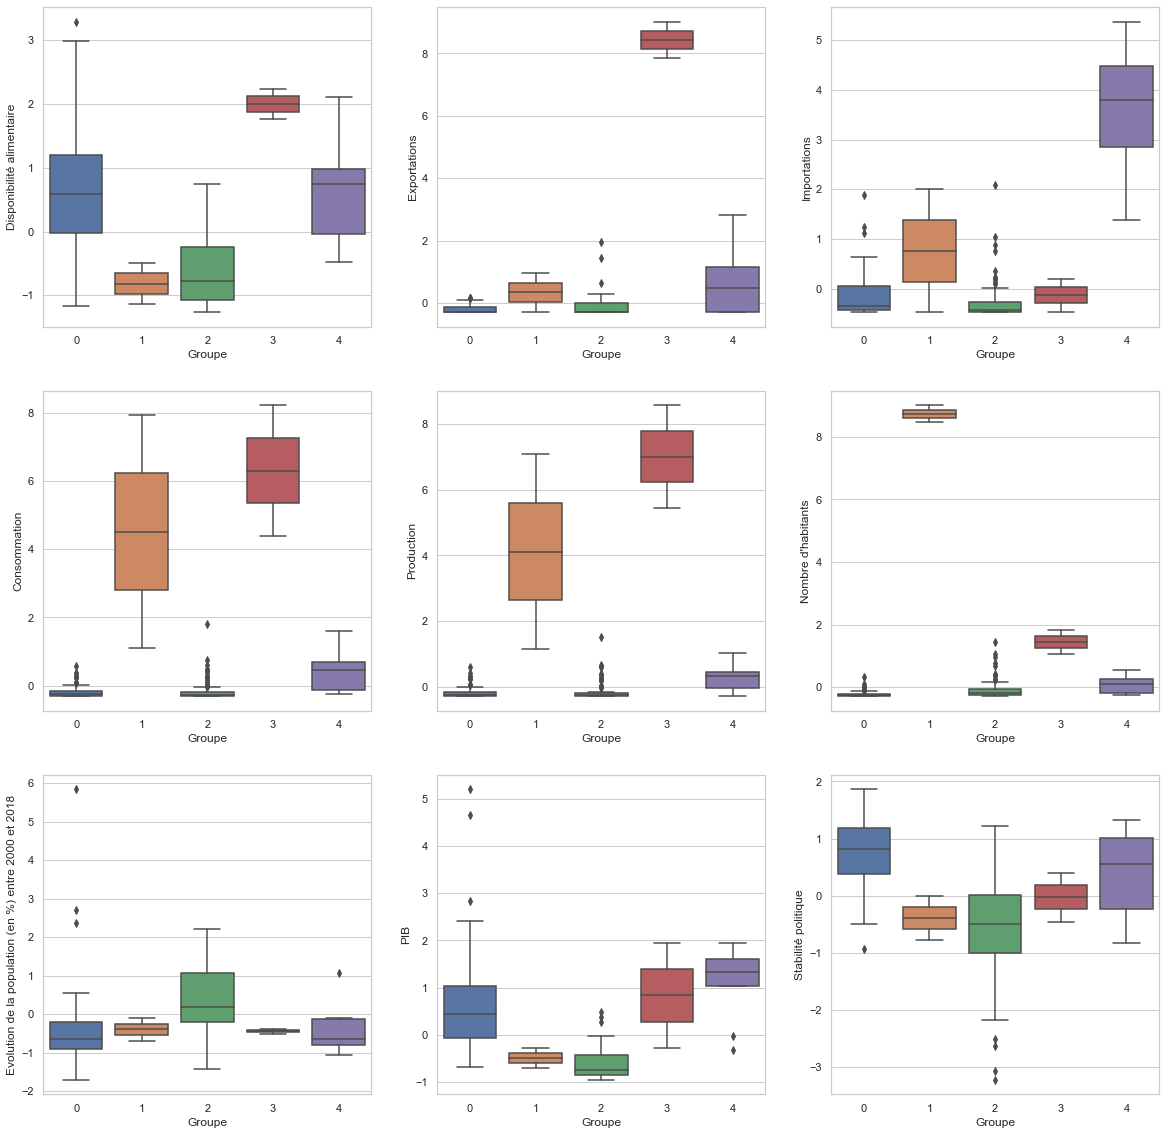

In [138]:
# Comparaison des groupes par Boxplot, les numéros des groupes sont en abscisse et les indicateurs en ordonnée
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

plt.subplot(331)
sns.boxplot(data=scaled_data_CAH, x='Groupe', y='Disponibilité alimentaire')

plt.subplot(332)
sns.boxplot(data=scaled_data_CAH, x='Groupe', y='Exportations')

plt.subplot(333)
sns.boxplot(data=scaled_data_CAH, x='Groupe', y='Importations')

plt.subplot(334)
sns.boxplot(data=scaled_data_CAH, x='Groupe', y='Consommation')

plt.subplot(335)
sns.boxplot(data=scaled_data_CAH, x='Groupe', y='Production')

plt.subplot(336)
sns.boxplot(data=scaled_data_CAH, x='Groupe', y="Nombre d'habitants")

plt.subplot(337)
sns.boxplot(data=scaled_data_CAH, x='Groupe', y='Evolution de la population (en %) entre 2000 et 2018')

plt.subplot(338)
sns.boxplot(data=scaled_data_CAH, x='Groupe', y='PIB')

plt.subplot(339)
sns.boxplot(data=scaled_data_CAH, x='Groupe', y='Stabilité politique')

plt.show(block=False)


- Le groupe 0 a une bonne disponibilité alimentaire de poulets, exporte très peu et importe un petit peu mais n'est pas un grand consommateur ni producteur de poulets même sir le PIB par habitants est bon et que la stabilité politique est bonne ;
- Les groupes 1 et 2 peuvent être écartés à cause de l'instabilité politique,
- Le groupe 3 retient notre attention, bonne disponibilité alimentaire, bon PIB par habitant et bonne stabilité politique mais une importante production.
- Le groupe 4 retient notre attention, peu d'exportations et beaucoup d'importations, production peu élevée et bon PIB par habitant.

In [139]:
# Grouper le data frame par groupe et moyenne
Moyenne_CAH=scaled_data_CAH.groupby(by='Groupe').mean().round(2)
Moyenne_CAH


,Disponibilité alimentaire,Exportations,Importations,Consommation,Production,Nombre d'habitants,Evolution de la population (en %) entre 2000 et 2018,PIB,Stabilité politique
Groupe,,,,,,,,,
0,0.72,-0.18,-0.13,-0.18,-0.18,-0.21,-0.42,0.68,0.77
1,-0.81,0.35,0.76,4.52,4.12,8.74,-0.40,-0.48,-0.39
2,-0.60,-0.12,-0.28,-0.15,-0.14,-0.08,0.36,-0.60,-0.58
3,2.00,8.43,-0.13,6.31,7.02,1.46,-0.44,0.84,-0.03
4,0.60,0.65,3.63,0.45,0.28,0.10,-0.43,1.12,0.39


<AxesSubplot:ylabel='Groupe'>

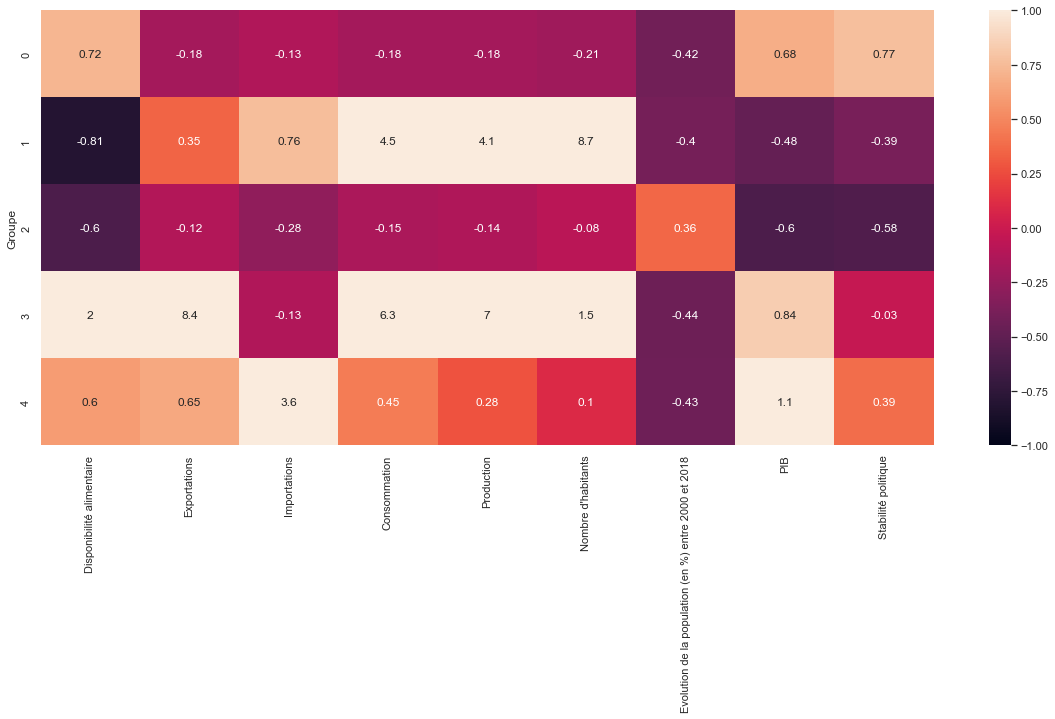

In [140]:
# Heatmap
fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(Moyenne_CAH,annot=True, vmin=-1, vmax=1)

- Chiffre positif : corrélation positive, variable représentée positivement
- Chiffre proche de 0 : aucune corrélation
- Chiffre négatif : corrélation négative, variable représentée négativement

Ces chiffres nous confirment que notre choix se porte sur le groupe 4.

# <a name="C3">III - METHODE DES K-MEANS

In [141]:
# Utilisation du data frame utilisé précédemment pour l'ACP
scaled_data

array([[-1.17710405e+00,  4.75136618e-03, -3.17790667e-01, ...,
         1.58011053e+00, -8.90035170e-01, -3.06251658e+00],
       [ 9.76881641e-01, -1.47660704e-01,  2.33530103e+00, ...,
        -9.24800910e-02, -3.10628377e-01, -2.39493147e-01],
       [-2.41986724e-01, -2.86447070e-01, -2.68558038e-01, ...,
        -1.30125225e+00, -3.64106869e-01,  4.99870134e-01],
       ...,
       [ 2.23736682e+00,  7.84687457e+00,  1.96416796e-01, ...,
        -5.04601713e-01,  1.95038808e+00,  3.99047868e-01],
       [-1.26538215e+00,  4.75136618e-03, -4.70958847e-01, ...,
         1.11669981e+00, -8.91841842e-01, -1.80783950e+00],
       [-9.92981148e-01, -2.86447070e-01, -4.43607387e-01, ...,
         8.93434311e-01, -8.60328169e-01,  2.98225603e-01]])

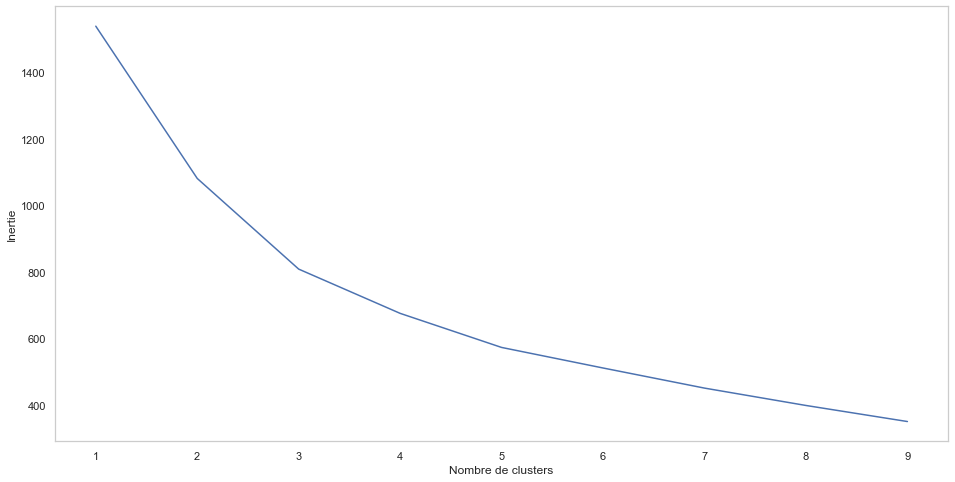

In [142]:
# Méthode du coude pour déterminer le nombre de clusters
inertia = []
k_range=range(1,10)
for k in k_range:
    model2=KMeans(n_clusters=k).fit(scaled_data)
    inertia.append(model2.inertia_)
    
fig = plt.figure(figsize=(16,8))
plt.plot(k_range,inertia )
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.grid()
plt.show()

In [146]:
# Ajout du numéro de cluster aux données originales
# Visualisation des clusters
# Clustering par K-means
kmeans = KMeans(init='random', n_clusters=5, n_init=10)
clusters2 = kmeans.fit_predict(scaled_data)
scaled_data_kmeans = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)
scaled_data_kmeans['Groupe'] = clusters2
scaled_data_kmeans.reset_index()

,Pays,Disponibilité alimentaire,Exportations,Importations,Consommation,Production,Nombre d'habitants,Evolution de la population (en %) entre 2000 et 2018,PIB,Stabilité politique,Groupe
0,Afghanistan,-1.177104,0.004751,-0.317791,-0.281294,-0.279749,-0.041926,1.580111,-0.890035,-3.062517,4
1,Afrique du Sud,0.976882,-0.147661,2.335301,0.651320,0.383605,0.093409,-0.092480,-0.310628,-0.239493,0
2,Albanie,-0.241987,-0.286447,-0.268558,-0.285062,-0.285820,-0.260227,-1.301252,-0.364107,0.499870,3
3,Algérie,-0.871283,-0.286447,-0.465489,-0.182851,-0.179780,-0.008650,0.157105,-0.414851,-0.956451,3
4,Allemagne,-0.045883,1.136664,4.129557,0.450667,0.321681,0.260988,-0.969323,1.614421,0.735122,0
...,...,...,...,...,...,...,...,...,...,...,...
166,Émirats arabes unis,1.467456,-0.079369,1.892207,-0.113141,-0.271654,-0.217085,5.844852,2.307245,0.768730,0
167,Équateur,-0.055972,-0.286447,-0.476429,-0.154590,-0.153473,-0.169402,0.113514,-0.420718,-0.004241,3
168,États-Unis d'Amérique,2.237367,7.846875,0.196417,8.218210,8.578192,1.844910,-0.504602,1.950388,0.399048,1
169,Éthiopie,-1.265382,0.004751,-0.470959,-0.300606,-0.285415,0.416106,1.116700,-0.891842,-1.807840,4


In [147]:
# Création d'un modèle PCA pour réduire nos données à 2 dimensions pour la visualisation
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [148]:
# Transférer les scaled data dans le nouvel espace ACP
X_reduced = pca.transform(scaled_data)
centres_reduced = pca.transform(kmeans.cluster_centers_)

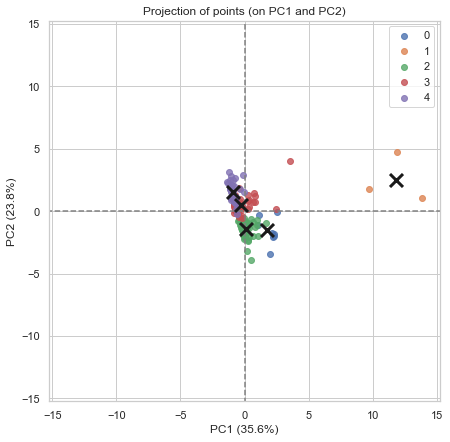

In [149]:
# Graphique avec les clusters et leurs centroïdes
display_factorial_planes(X_reduced, 2, pca, [(0,1)], illustrative_var = clusters2, alpha = 0.8)
plt.scatter(centres_reduced[:, 0], centres_reduced[:, 1],
            marker='x', s=169, linewidths=3,
            color='k', zorder=10)



In [150]:
# Nombre de pays par groupe
scaled_data_kmeans['Groupe'].value_counts()

2    60
3    57
4    42
0     9
1     3
Name: Groupe, dtype: int64

In [151]:
# Identification des pays du groupe 0 (9 pays)
df_groupe0_kmeans = scaled_data_kmeans.loc[scaled_data_kmeans['Groupe']== 0].reset_index()
df_groupe0_kmeans['Pays'].unique()

array(['Afrique du Sud', 'Allemagne', 'Arabie saoudite',
       'Chine - RAS de Hong-Kong', 'Japon', 'Mexique', 'Pays-Bas',
       "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord",
       'Émirats arabes unis'], dtype=object)

In [152]:
# Identification des pays du groupe 1 (3 pays)
df_groupe1_kmeans = scaled_data_kmeans.loc[scaled_data_kmeans['Groupe']== 1].reset_index()
df_groupe1_kmeans['Pays'].unique()

array(['Brésil', 'Chine, continentale', "États-Unis d'Amérique"],
      dtype=object)

In [159]:
# Identification des pays du groupe 2 (60 pays)
df_groupe2_kmeans = scaled_data_kmeans.loc[scaled_data_kmeans['Groupe']== 2].reset_index()
df_groupe2_kmeans['Pays'].unique()

array(['Antigua-et-Barbuda', 'Argentine', 'Australie', 'Autriche',
       'Bahamas', 'Barbade', 'Belgique', 'Bulgarie', 'Bélarus', 'Canada',
       'Chili', 'Chine - RAS de Macao', 'Chine, Taiwan Province de',
       'Chypre', 'Costa Rica', 'Croatie', 'Cuba', 'Danemark', 'Dominique',
       'Espagne', 'Estonie', 'Fidji', 'Finlande', 'Grenade', 'Guyana',
       'Hongrie', 'Irlande', 'Islande', 'Israël', 'Italie', 'Jamaïque',
       'Koweït', 'Lettonie', 'Lituanie', 'Luxembourg', 'Malaisie',
       'Malte', 'Maurice', 'Norvège', 'Nouvelle-Calédonie',
       'Nouvelle-Zélande', 'Panama', 'Pologne', 'Polynésie française',
       'Portugal', 'Roumanie', 'République de Corée',
       'République dominicaine', 'Saint-Kitts-et-Nevis',
       'Saint-Vincent-et-les Grenadines', 'Sainte-Lucie', 'Samoa',
       'Slovaquie', 'Slovénie', 'Suisse', 'Suriname', 'Suède', 'Tchéquie',
       'Trinité-et-Tobago', 'Uruguay'], dtype=object)

In [160]:
# Identification des pays du groupe 3 (57 pays)
df_groupe3_kmeans = scaled_data_kmeans.loc[scaled_data_kmeans['Groupe']== 3].reset_index()
df_groupe3_kmeans['Pays'].unique()

array(['Albanie', 'Algérie', 'Arménie', 'Azerbaïdjan', 'Bangladesh',
       'Belize', 'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Botswana', 'Cabo Verde', 'Cambodge', 'Colombie', 'Djibouti',
       'El Salvador', 'Eswatini', 'Fédération de Russie', 'Grèce',
       'Guatemala', 'Géorgie', 'Haïti', 'Honduras', 'Inde', 'Indonésie',
       "Iran (République islamique d')", 'Kazakhstan', 'Kirghizistan',
       'Kiribati', 'Lesotho', 'Macédoine du Nord', 'Maroc', 'Mongolie',
       'Monténégro', 'Myanmar', 'Namibie', 'Nicaragua', 'Népal',
       'Ouzbékistan', 'Paraguay', 'Philippines', 'Pérou',
       'République de Moldova', 'République démocratique populaire lao',
       'République populaire démocratique de Corée',
       'Sao Tomé-et-Principe', 'Serbie', 'Sri Lanka', 'Thaïlande',
       'Timor-Leste', 'Tunisie', 'Turkménistan', 'Turquie', 'Ukraine',
       'Vanuatu', 'Venezuela (République bolivarienne du)', 'Viet Nam',
       'Zimbabwe', 'Équateur'], dtype=object)

In [161]:
# Identification des pays du groupe 4 (42 pays)
df_groupe4_kmeans = scaled_data_kmeans.loc[scaled_data_kmeans['Groupe']== 4].reset_index()
df_groupe4_kmeans['Pays'].unique()

array(['Afghanistan', 'Angola', 'Burkina Faso', 'Bénin', 'Cameroun',
       'Congo', "Côte d'Ivoire", 'Gabon', 'Gambie', 'Ghana', 'Guinée',
       'Guinée-Bissau', 'Iraq', 'Jordanie', 'Kenya', 'Liban', 'Libéria',
       'Madagascar', 'Malawi', 'Maldives', 'Mali', 'Mauritanie',
       'Mozambique', 'Niger', 'Nigéria', 'Oman', 'Ouganda', 'Pakistan',
       'Rwanda', 'République centrafricaine',
       'République-Unie de Tanzanie', 'Sierra Leone', 'Soudan', 'Sénégal',
       'Tadjikistan', 'Tchad', 'Togo', 'Yémen', 'Zambie', 'Égypte',
       'Éthiopie', 'Îles Salomon'], dtype=object)

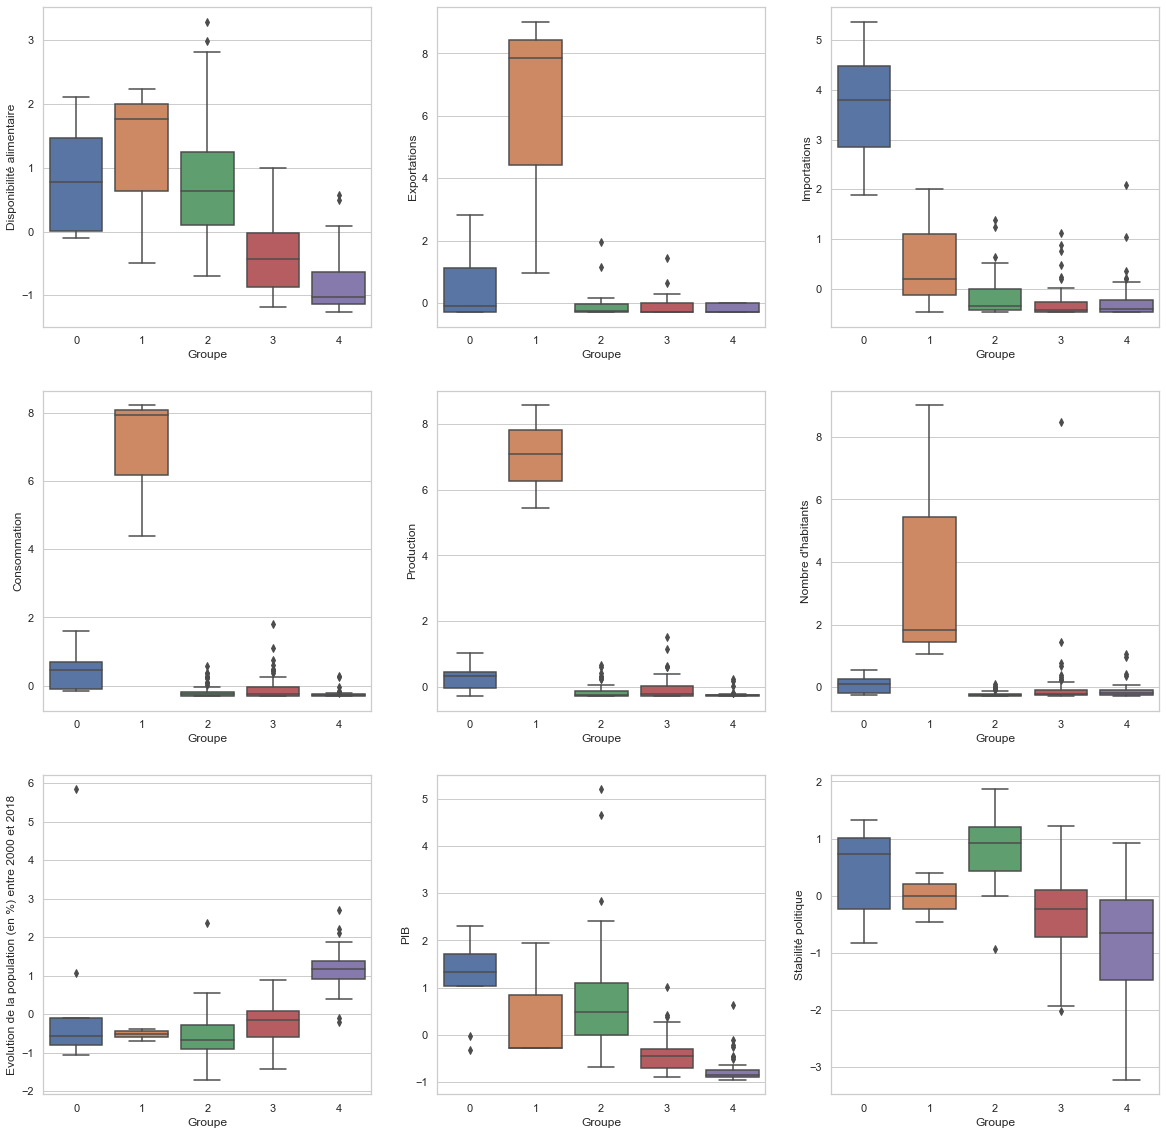

In [162]:
# Comparaison des groupes par Boxplot les numéros des groupes sont en abscisse et les indicateurs en ordonnée
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

plt.subplot(331)
sns.boxplot(data=scaled_data_kmeans, x='Groupe', y='Disponibilité alimentaire')

plt.subplot(332)
sns.boxplot(data=scaled_data_kmeans, x='Groupe', y='Exportations')

plt.subplot(333)
sns.boxplot(data=scaled_data_kmeans, x='Groupe', y='Importations')

plt.subplot(334)
sns.boxplot(data=scaled_data_kmeans, x='Groupe', y='Consommation')

plt.subplot(335)
sns.boxplot(data=scaled_data_kmeans, x='Groupe', y='Production')

plt.subplot(336)
sns.boxplot(data=scaled_data_kmeans, x='Groupe', y="Nombre d'habitants")

plt.subplot(337)
sns.boxplot(data=scaled_data_kmeans, x='Groupe', y='Evolution de la population (en %) entre 2000 et 2018')

plt.subplot(338)
sns.boxplot(data=scaled_data_kmeans, x='Groupe', y='PIB')

plt.subplot(339)
sns.boxplot(data=scaled_data_kmeans, x='Groupe', y='Stabilité politique')

plt.show(block=False)




- Le groupe 0 retient notre attention, peu d'exportations et beaucoup d'importations, production peu élevée et bon PIB par habitant,
- Le groupe 1 a un bon PIB par habitant, produit, consomme et exporte beaucoup de poulets,
- Le groupe 2 a un bon PIB par habitant, une bonne stabilité politique ainsi qu'une bonne disponibilité alimentaire de poulets, mais la consommation de poulets est basse, 
- Le groupe 3 peut être écarté à cause de son PIB par habitant qui est bas,
- Le groupe 4 peut-être écarté à cause la stabilité politique et du PIB par habitant qui sont bas.

In [163]:
# Grouper le data frame par groupe et moyenne
scaled_data_kmeans_moyenne=scaled_data_kmeans.groupby(by='Groupe').mean().round(2)
scaled_data_kmeans_moyenne

,Disponibilité alimentaire,Exportations,Importations,Consommation,Production,Nombre d'habitants,Evolution de la population (en %) entre 2000 et 2018,PIB,Stabilité politique
Groupe,,,,,,,,,
0,0.82,0.51,3.68,0.47,0.26,0.10,0.29,1.21,0.42
1,1.17,5.95,0.58,6.85,7.04,3.98,-0.52,0.46,-0.02
2,0.80,-0.12,-0.16,-0.17,-0.16,-0.22,-0.57,0.73,0.83
3,-0.41,-0.14,-0.27,-0.08,-0.07,0.06,-0.27,-0.44,-0.28
4,-0.84,-0.17,-0.23,-0.24,-0.24,-0.08,1.16,-0.74,-0.89


<AxesSubplot:ylabel='Groupe'>

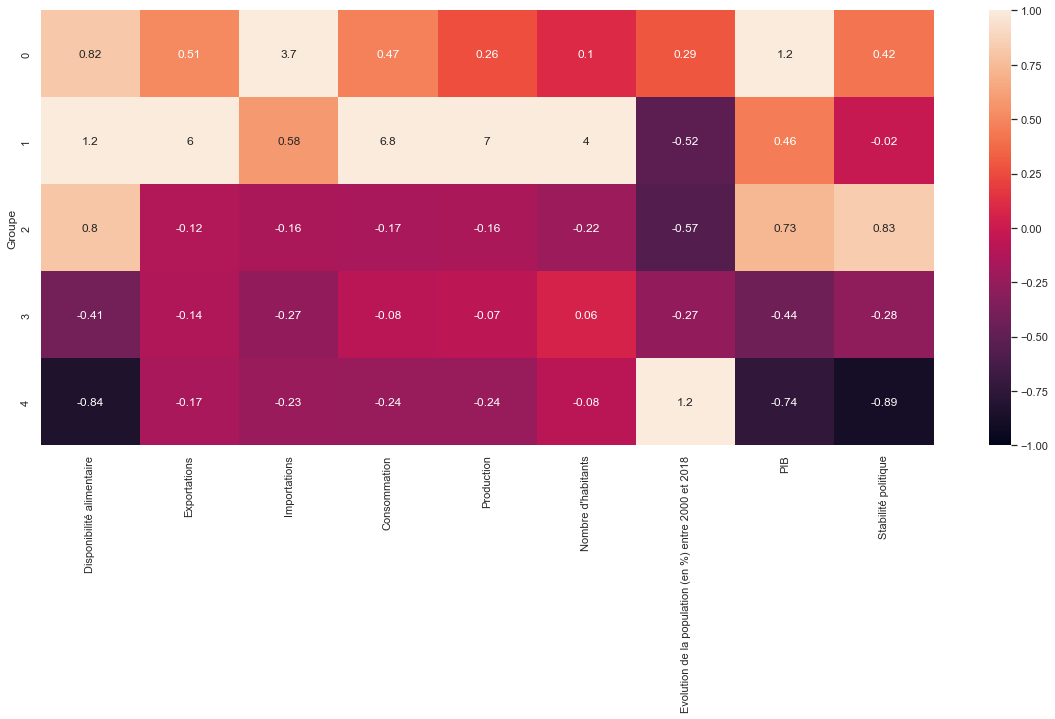

In [164]:
# Heatmap
fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(scaled_data_kmeans_moyenne,annot=True, vmin=-1, vmax=1)

- Chiffre positif : corrélation positive, variable représentée positivement
- Chiffre proche de 0 : aucune corrélation
- Chiffre négatif : corrélation négative, variable représentée négativement

Ces chiffres nous confirment que notre choix se porte sur le groupe 0.

In [165]:
# Liste des pays du groupe 0 de la méthode des K-means
Liste_pays_kmeans=df_groupe0_kmeans['Pays'].unique()
Liste_pays_kmeans

array(['Afrique du Sud', 'Allemagne', 'Arabie saoudite',
       'Chine - RAS de Hong-Kong', 'Japon', 'Mexique', 'Pays-Bas',
       "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord",
       'Émirats arabes unis'], dtype=object)

In [167]:
Liste_pays_CAH=df_groupe4_CAH['Pays'].unique()
Liste_pays_CAH

array(['Afrique du Sud', 'Allemagne', 'Arabie saoudite', 'Belgique',
       'Chine - RAS de Hong-Kong', 'Japon', 'Mexique', 'Pays-Bas',
       "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"],
      dtype=object)

In [168]:
# Comparaison des 2 listes 
Liste_finale = df_groupe0_kmeans.loc[df_groupe0_kmeans['Pays'].isin(Liste_pays_CAH)]
Liste_finale['Pays']

0                                       Afrique du Sud
1                                            Allemagne
2                                      Arabie saoudite
3                             Chine - RAS de Hong-Kong
4                                                Japon
5                                              Mexique
6                                             Pays-Bas
7    Royaume-Uni de Grande-Bretagne et d'Irlande du...
Name: Pays, dtype: object

Ci-dessus la liste des pays recommandés pour l'exportation de poulets.